Name: Nicole Yap </br>
Assignment Dataset: Dataset: Airfoil Self Noise Dataset </br>
Goal: Build a ML model to predict the sound pressure level of an airfoil </br>

In [21]:
#import libraries

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, mean_squared_error, mean_absolute_error


In [2]:
# Download dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
r = requests.get(url)
open("airfoil_self_noise.dat", "wb").write(r.content)

# Load dataset into pandas dataframe
df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)
df.columns = ["frequency", "angle_of_attack", "chord_length", "free-stream_velocity", "suction_side_displacement_thickness", "sound_pressure_level"]


In [3]:
df.head(5)

,frequency,angle_of_attack,chord_length,free-stream_velocity,suction_side_displacement_thickness,sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
# Check for null or missing values
print(df.isnull().sum())

frequency                              0
angle_of_attack                        0
chord_length                           0
free-stream_velocity                   0
suction_side_displacement_thickness    0
sound_pressure_level                   0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free-stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   sound_pressure_level                 1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


<AxesSubplot:xlabel='sound_pressure_level', ylabel='count'>

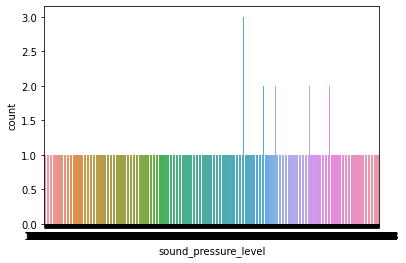

In [6]:
# Class imbalance visualization
sns.countplot(x="sound_pressure_level", data=df)

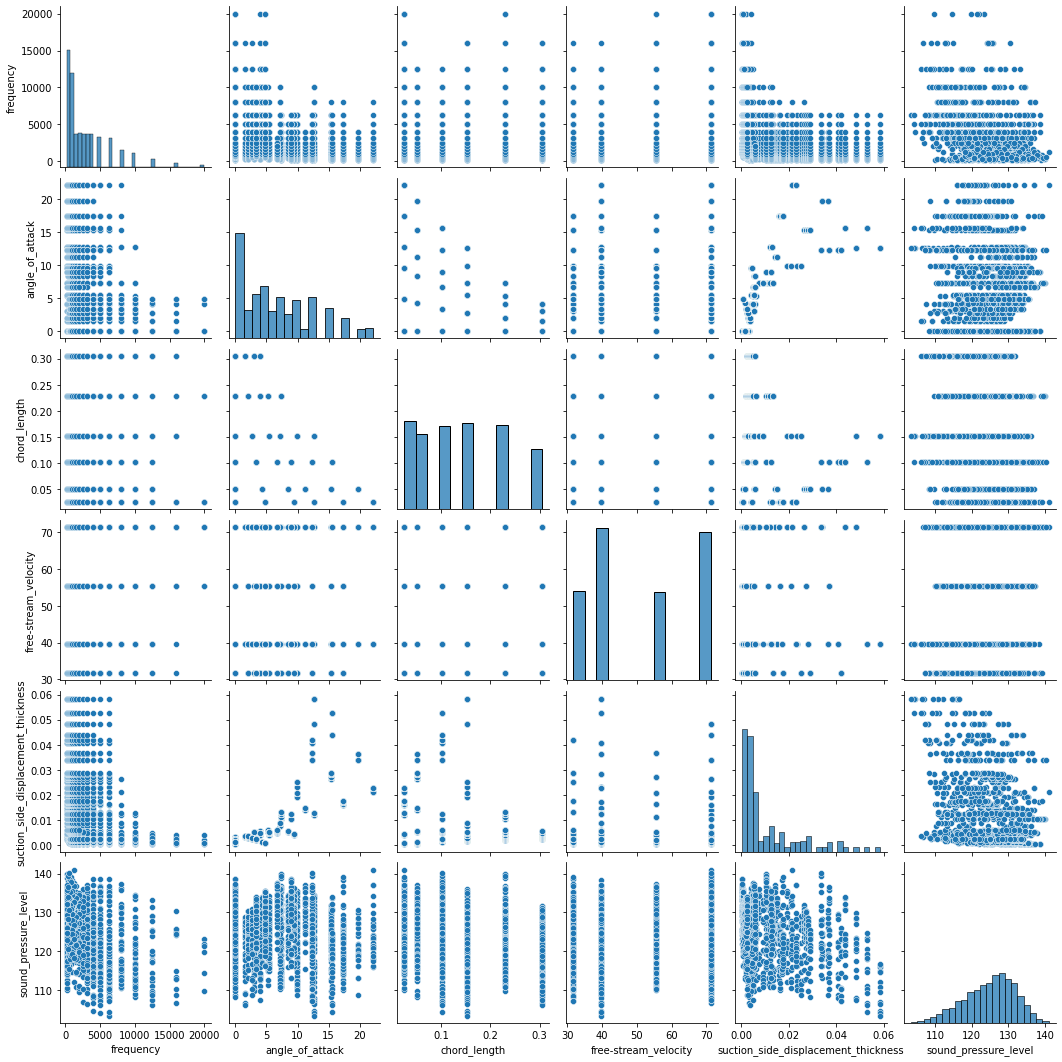

In [7]:
# Dataset exploration visualizations
sns.pairplot(data=df, vars=["frequency", "angle_of_attack", "chord_length", "free-stream_velocity", "suction_side_displacement_thickness", "sound_pressure_level"])


<AxesSubplot:>

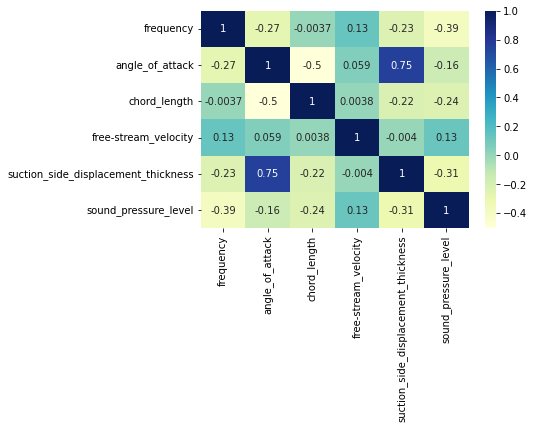

In [8]:
# Correlational analysis visualization
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

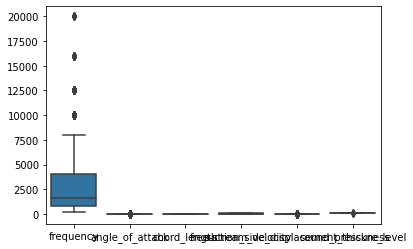

In [9]:
# Check for outliers
sns.boxplot(data=df)

In [10]:
# Handling of outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return df

df = handle_outliers(df, "frequency")

<AxesSubplot:>

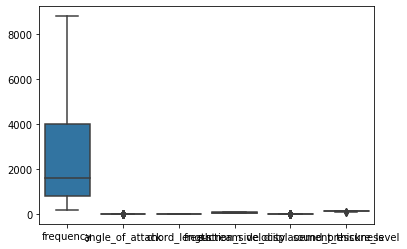

In [11]:
# Check for outliers
sns.boxplot(data=df)

<AxesSubplot:xlabel='sound_pressure_level', ylabel='Count'>

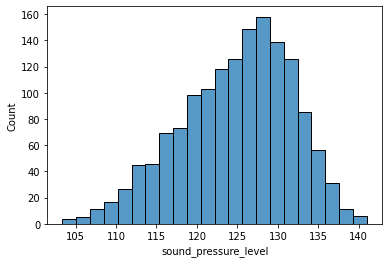

In [12]:
# Check for skewed data
sns.histplot(df["sound_pressure_level"])

In [13]:
# Apply feature transformation techniques
scaler = StandardScaler()
df[["frequency", "angle_of_attack", "chord_length", "free-stream_velocity", "suction_side_displacement_thickness"]] = scaler.fit_transform(df[["frequency", "angle_of_attack", "chord_length", "free-stream_velocity", "suction_side_displacement_thickness"]])


<BarContainer object of 5 artists>

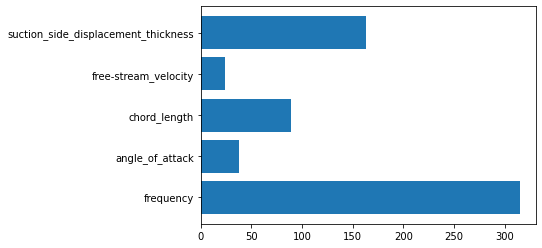

In [14]:
# Check feature importance
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
f_values, p_values = f_regression(X, y)
plt.barh(X.columns, f_values)

In [15]:
# Split the data into training and testing sets
#Case1
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=99)
#Case2
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=99)

In [34]:
#Linear Regression

lr = LinearRegression()

# Loop over the train/test splits and fit/evaluate the models
for i in range(2):
    if i == 0:
        # Case 1: 80/20 train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        # Case 2: 10/90 train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    
    # Linear Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test) 
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
    lr_r2 = r2_score(y_test, lr_pred)
    
    # Print the results
    print(f'Case {i+1}:')
    print(f'Linear Regression - RMSE: {lr_rmse:.3f}, R^2: {lr_r2:.3f}, mae: {lr_mae:.3f}')

Case 1:
Linear Regression - RMSE: 4.632, R^2: 0.572, mae: 3.514
Case 2:
Linear Regression - RMSE: 4.719, R^2: 0.531, mae: 3.613


In [26]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LinearRegression()
scores = cross_val_score(model, 
                         X, 
                         y, 
                         scoring = 'neg_root_mean_squared_error',
                         cv = cv, 
                         n_jobs = -1)

<IPython.core.display.Javascript object>

In [27]:

# Initialize the cross-validation object
kf = KFold(n_splits=5)

# Initialize the model
kfold_model = LinearRegression()

# Perform K-Fold Cross-Validation
scores = cross_val_score(kfold_model, X, y, cv=kf, scoring='neg_mean_squared_error')
scores 

# Calculate the MSE and RMSE
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

# Print the MSE, RMSE, and R2
print("MSE:", mse_scores.mean())
print("RMSE:", rmse_scores.mean())


<IPython.core.display.Javascript object>

MSE: 25.110948203035136
RMSE: 4.800579000351045


In [41]:
# Gradient Boosting

gbr = GradientBoostingRegressor()

# Loop over the train/test splits and fit/evaluate the models
for i in range(2):
    if i == 0:
        # Case 1: 80/20 train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    else:
        # Case 2: 10/90 train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)
    
    # Gradient Boosting
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    gbr_mae = mean_absolute_error(y_test, y_pred)
    gbr_rmse = mean_squared_error(y_test, y_pred, squared=False)
    gbr_r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f'Case {i+1}:')
    print(f'Linear Regression - RMSE: {gbr_rmse:.3f}, R^2: {gbr_r2:.3f}, mae: {gbr_mae:.3f}')

Case 1:
Linear Regression - RMSE: 2.677, R^2: 0.839, mae: 2.003
Case 2:
Linear Regression - RMSE: 4.057, R^2: 0.656, mae: 3.076
